In [155]:
#This is a trial with the adiabatic flame temperature using GRIMECH3.0 over a range of equivalence ratios

from cantera import *
from pylab import *
import sys
import csv
import matplotlib.pyplot as plt

In [156]:
# Problem; given a fuel-oxidizer mixture at a given T and P, determine the adiabatic flame temperature. Specifically, determine the Tad as a function of equivalence ratio.

In [157]:
# Edit these parameters to change the initial temperature, the pressure, and the phases in the mixture
temp = 298.0
pres = 101325.0

# phases
gas  = Solution('gri30.cti')
carbon = Solution('graphite.cti')

# the phases that will be included in the calculation, and their
# initial moles
mix_phases = [(gas, 1.0), (carbon, 0.0)]

# gaseous fuel species
fuel_species = 'C3H8'

# air composition
air_N2_O2_ratio = 3.76

# create a mixture object out of the fuel and oxidizer
mix = Mixture(mix_phases)

nsp = mix.n_species

In [158]:
# equivalence ratio range
phi_min = 0.8
phi_max = 1.2
npoints = 10

In [159]:
# find fuel, nitrogen, and oxygen indices
ifuel = gas.species_index(fuel_species)
io2 = gas.species_index("O2")
in2 = gas.species_index("N2")

In [160]:
stoich_O2 = gas.n_atoms(fuel_species,'C') + 0.25*gas.n_atoms(fuel_species,'H')
#           ^^^^^^^^^^                      ^^^^^^^^^^^^^^^
#         accounts for formation of CO2     accounts for formation of H2O (4 H's per O2)

In [161]:
# create some arrays to hold the data
phi = zeros(npoints, 'd')
tad = zeros(npoints, 'd')
xeq = zeros([nsp, npoints], 'd')

In [162]:
for i in range(npoints):
    phi[i] = phi_min + (phi_max - phi_min)*i/(npoints - 1)
    x = zeros(nsp-1, "d")
    x[ifuel] = phi[i]
    x[io2] = stoich_O2
    x[in2] = stoich_O2*air_N2_O2_ratio
    # set the gas state
    gas.TPX = temp, pres, x
    mix = Mixture(mix_phases)
    mix.P = pres
    mix.T = temp
    mix.equilibrate('HP', max_steps = 1000, rtol = 1.0e-6, max_iter = 200, log_level=0)
    tad[i] = mix.T
    print('At phi = {}, Tad = {}'.format(phi[i], tad[i]))
    xeq[:,i] = mix.species_moles

At phi = 0.8, Tad = 2041.2873312094764
At phi = 0.8444444444444444, Tad = 2106.3495473592825
At phi = 0.888888888888889, Tad = 2164.968974394977
At phi = 0.9333333333333333, Tad = 2214.8439939765462
At phi = 0.9777777777777777, Tad = 2252.6401418892497
At phi = 1.0222222222222221, Tad = 2273.8924242754433
At phi = 1.0666666666666667, Tad = 2275.026734425752
At phi = 1.1111111111111112, Tad = 2258.3539345016447
At phi = 1.1555555555555554, Tad = 2231.184837247801
At phi = 1.2, Tad = 2199.3434321446703


In [163]:
# create array with species names
neq = mix.species_names

# write output CSV file for importing into Excel
csvfile = 'adiabatic.csv'
f = open(csvfile, 'w')
csv.writer(f,['phi','T (K)']+mix.species_names)
for n in range(npoints):
    csv.writer(f,[phi[n], tad[n]]+list(xeq[:,n]))
f.close()
print('output written to '+csvfile)

output written to adiabatic.csv


In [164]:
species = list()
species.append('CO2')
species.append('CO')
species.append('H2O')
species.append('H2')
species.append('OH')
species.append('H')
species.append('O2')
species.append('O')
species.append('NO')
species.append('N2')
species.append('N')

In [165]:
xlim = 0.04

In [166]:
fig=figure(1)

<Figure size 432x288 with 0 Axes>

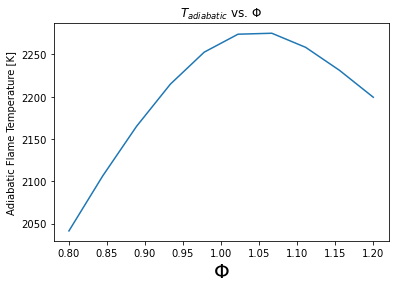

In [167]:
title(r'$T_{adiabatic}$ vs. $\Phi$')
xlabel(r'$\Phi$', fontsize=20)
ylabel("Adiabatic Flame Temperature [K]")
plt.plot(phi, tad)
plt.show()